In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
car_df =pd.read_excel(r"C:\Users\AnnamalaiG\OneDrive\Desktop\coures4\DS1_C4_S9_Car_Data.xlsx")

In [3]:
car_df

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,...,Central_Locking,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning
0,0,Tata,Nano Genx,Xt,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,624.0,2.0,2.0,24.0,Petrol,1652.0,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,624.0,2.0,2.0,15.0,CNG,1652.0,...,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,624.0,2.0,2.0,24.0,Petrol,1652.0,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271,Honda,City,Vx Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,1495.0,...,Yes,Yes,NaN,NaN,Yes,Yes,1545 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes
1272,1272,Honda,City,Zx Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,1495.0,...,Yes,Yes,NaN,NaN,Yes,Yes,1550 kg,"Drive side airbag, Curtain airbags, Driver fro...",Yes,Yes
1273,1273,Honda,City,Zx Cvt Petrol,1497.0,4.0,4.0,40.0,Petrol,1495.0,...,Yes,Yes,NaN,NaN,Yes,Yes,1482 kg,"Curtain airbags, Driver frontal airbag, Front ...",Yes,Yes
1274,1274,Honda,City,V Cvt Petrol,1497.0,4.0,4.0,40.0,Petrol,1495.0,...,Yes,Yes,NaN,NaN,Yes,Yes,1455 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes


In [4]:
car_df.columns

Index(['S. No.', 'Make', 'Model', 'Variant', 'Displacement', 'Cylinders',
       'Valves_Per_Cylinder', 'Fuel_Tank_Capacity_litre', 'Fuel_Type',
       'Height_mm', 'Length_mm', 'Width_mm', 'Body_Type', 'Doors',
       'City_Mileage_km_litre', 'Highway_Mileage_km_litre', 'Kerb_Weight',
       'Power', 'Torque', 'Seating_Capacity', 'Central_Locking',
       'Child_Safety_Locks', 'Hill_Assist', 'Drive_Modes',
       'High_Speed_Alert_System', 'ABS_(Anti-lock_Braking_System)',
       'Gross_Vehicle_Weight', 'Airbags', 'Door_Ajar_Warning',
       'Fasten_Seat_Belt_Warning'],
      dtype='object')

In [6]:
# STEP 1: Count missing values in each column
missing_values = car_df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 S. No.                               0
Make                                75
Model                                0
Variant                              0
Displacement                        12
Cylinders                           66
Valves_Per_Cylinder                102
Fuel_Tank_Capacity_litre            69
Fuel_Type                            0
Height_mm                            1
Length_mm                            0
Width_mm                            12
Body_Type                            6
Doors                                4
City_Mileage_km_litre              555
Highway_Mileage_km_litre           800
Kerb_Weight                        365
Power                                0
Torque                               2
Seating_Capacity                     6
Central_Locking                    149
Child_Safety_Locks                  75
Hill_Assist                        796
Drive_Modes                       1081
High_Speed_Alert_System         

In [8]:
# STEP 2: List of numerical columns for missing value imputation
num_col = ['Displacement', 'Cylinders', 'Valves_Per_Cylinder', 'Fuel_Tank_Capacity_litre', 'Height_mm']

# Replace missing values in numerical columns
for col in num_col:
    # Fill missing values with group mean (by 'Make'), then with overall mean
    car_df[col] = car_df.groupby('Make')[col].transform(lambda x: x.fillna(x.mean()))
    car_df[col] = car_df[col].fillna(car_df[col].mean())

# Verify that all missing numerical values are filled
print("Missing values after imputation (numerical columns):\n", car_df[num_col].isnull().sum())

Missing values after imputation (numerical columns):
 Displacement                0
Cylinders                   0
Valves_Per_Cylinder         0
Fuel_Tank_Capacity_litre    0
Height_mm                   0
dtype: int64


In [13]:
# STEP 3: Replace missing values in categorical columns with "Not Available"
categorical_columns = ['Fuel_Type', 'Central_Locking', 'Child_Safety_Locks', 'Drive_Modes', 
                       'ABS_(Anti-lock_Braking_System)', 'Airbags']

car_df[categorical_columns] = car_df[categorical_columns].fillna('Not Available')

# Display first 5 rows after preprocessing
car_df.head()


,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,...,Central_Locking,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning
0,0,Tata,Nano Genx,Xt,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Yes,Yes,NaN,Not Available,NaN,Not Available,NaN,Not Available,NaN,NaN
1,1,Tata,Nano Genx,Xe,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Not Available,Yes,NaN,Not Available,NaN,Not Available,NaN,Not Available,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,624.0,2.0,2.0,15.0,CNG,1652.0,...,Not Available,Yes,Yes,Not Available,NaN,Not Available,NaN,Not Available,NaN,NaN
3,3,Tata,Nano Genx,Xta,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Yes,Yes,NaN,Not Available,NaN,Not Available,NaN,Not Available,NaN,NaN
4,4,Tata,Nano Genx,Xm,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Not Available,Yes,NaN,Not Available,NaN,Not Available,NaN,Not Available,NaN,NaN


ABS_(Anti-lock_Braking_System)    1276
Airbags                              0
Hill_Assist                       1276
dtype: int64


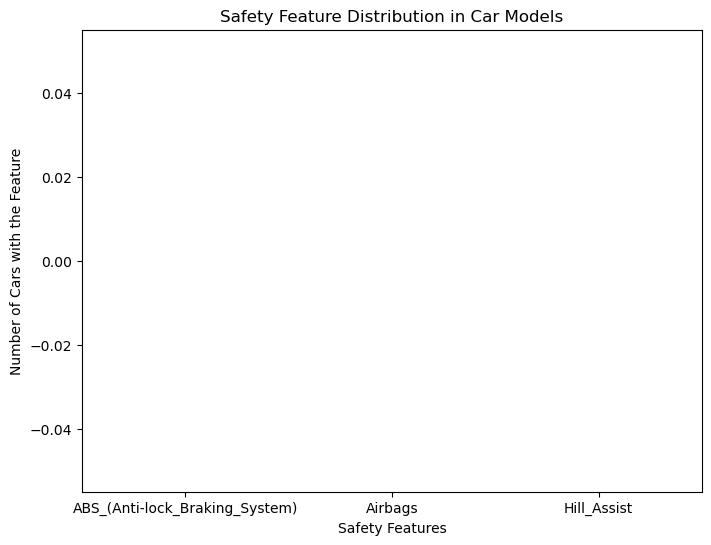

In [20]:
# Task 1
# Convert safety features to binary (1 = Present, 0 = Not Present)
safety_columns = ['ABS_(Anti-lock_Braking_System)', 'Airbags', 'Hill_Assist']

# Replace 'Present' with 1, 'Absent' with 0
for col in safety_columns:
    car_df[col] = car_df[col].replace({'Present': 1, 'Absent': 0})

# Convert to numeric (handle any incorrect values)
car_df[safety_columns] = car_df[safety_columns].apply(pd.to_numeric, errors='coerce')

# Check for NaN values
print(car_df[safety_columns].isnull().sum())

# Summarize the presence of each safety feature
safety_summary = car_df[safety_columns].sum()

# Plot a bar chart
safety_summary.plot(kind='bar', color=['green', 'pink', 'blue'], figsize=(8, 6))
plt.title("Safety Feature Distribution in Car Models")
plt.ylabel("Number of Cars with the Feature")
plt.xlabel("Safety Features")
plt.xticks(rotation=0)
plt.show()

Central Locking unique values: ['Yes' 'Not Available']
Child Safety Locks unique values: ['Yes' 'Not Available']
Average Seating Capacity: 5.27
Cars with Central Locking: 1127.0
Cars with Child Safety Locks: 1201.0


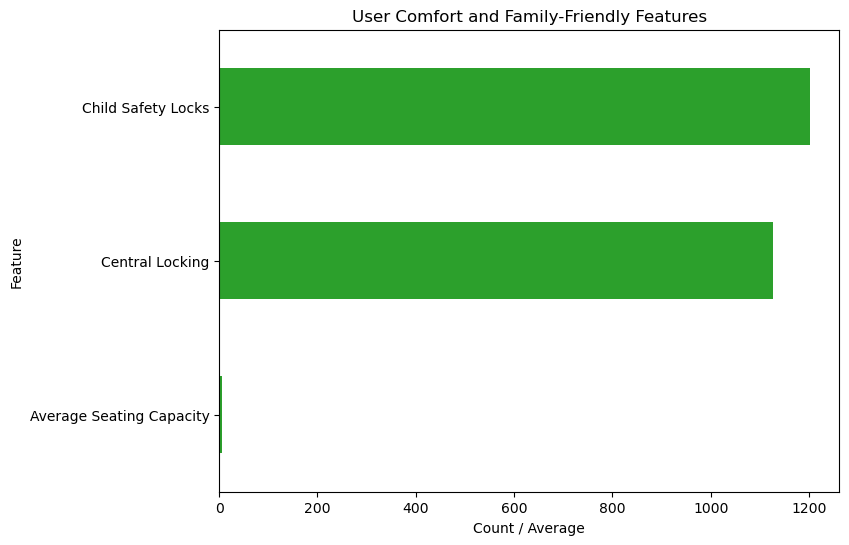

In [28]:
# Task 2
# Check unique values in Central_Locking and Child_Safety_Locks columns
print("Central Locking unique values:", car_df['Central_Locking'].unique())
print("Child Safety Locks unique values:", car_df['Child_Safety_Locks'].unique())

# Replace 'Yes' and 'No' with 1 and 0 for Central Locking and Child Safety Lock
car_df[['Central_Locking', 'Child_Safety_Locks']] = car_df[['Central_Locking', 'Child_Safety_Locks']].replace({'Yes': 1, 'No': 0})

# Convert the columns to numeric, coercing errors to NaN (if any unexpected values exist)
car_df[['Central_Locking', 'Child_Safety_Locks']] = car_df[['Central_Locking', 'Child_Safety_Locks']].apply(pd.to_numeric, errors='coerce')

# Ensure Seating Capacity is numeric
car_df['Seating_Capacity'] = pd.to_numeric(car_df['Seating_Capacity'], errors='coerce')

# Calculate the average seating capacity
average_seating_capacity = car_df['Seating_Capacity'].mean()

# Count the occurrences of Central Locking and Child Safety Locks
central_locking_count = car_df['Central_Locking'].sum()
child_safety_locks_count = car_df['Child_Safety_Locks'].sum()

# Display the results
print(f"Average Seating Capacity: {average_seating_capacity:.2f}")
print(f"Cars with Central Locking: {central_locking_count}")
print(f"Cars with Child Safety Locks: {child_safety_locks_count}")

# Create a summary DataFrame for visualization
summary_data = {
    'Feature': ['Average Seating Capacity', 'Central Locking', 'Child Safety Locks'],
    'Value': [average_seating_capacity, central_locking_count, child_safety_locks_count]
}
summary_df = pd.DataFrame(summary_data)

# Plotting the summary
summary_df.plot(kind='barh', x='Feature', y='Value', color='#2ca02c', legend=False, figsize=(8, 6))
plt.title("User Comfort and Family-Friendly Features")
plt.xlabel("Count / Average")
plt.show()


In [30]:
# Task 3
car_df[['High_Speed_Alert_System', 'Fasten_Seat_Belt_Warning', 'Door_Ajar_Warning']] = (
    car_df[['High_Speed_Alert_System', 'Fasten_Seat_Belt_Warning', 'Door_Ajar_Warning']]
    .replace({'Yes': 1, 'No': 0})
    .apply(pd.to_numeric, errors='coerce')
)
alert_summary = car_df[['High_Speed_Alert_System', 'Fasten_Seat_Belt_Warning', 'Door_Ajar_Warning']].sum()
print("Feature Presence Summary:")
print(alert_summary)


Feature Presence Summary:
High_Speed_Alert_System      208.0
Fasten_Seat_Belt_Warning    1086.0
Door_Ajar_Warning           1133.0
dtype: float64


C:\Users\AnnamalaiG\AppData\Local\Temp\ipykernel_8688\3739464449.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'Yes': 1, 'No': 0})


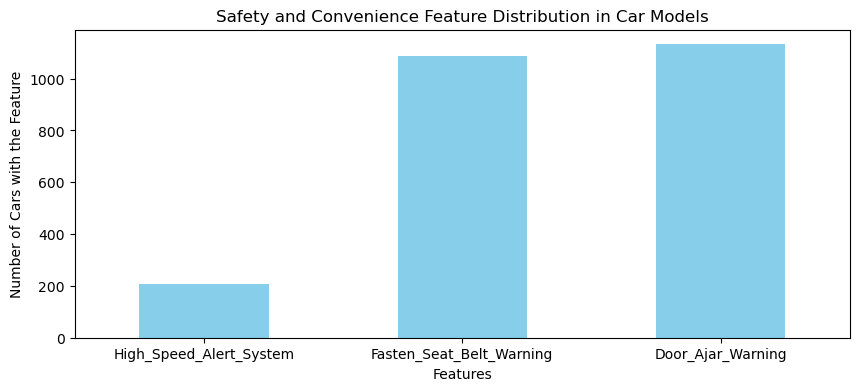

In [32]:
import matplotlib.pyplot as plt

alert_summary.plot(kind='bar', color='skyblue', figsize=(10, 4))
plt.title("Safety and Convenience Feature Distribution in Car Models")
plt.ylabel("Number of Cars with the Feature")
plt.xlabel("Features")
plt.xticks(rotation=0)  
plt.show()

In [36]:
# Task 4

# Ensure dimensional columns are numeric, coercing errors to NaN if needed
car_df[['Height_mm', 'Length_mm', 'Width_mm']] = car_df[['Height_mm', 'Length_mm', 'Width_mm']].apply(pd.to_numeric, errors='coerce')

# Group by 'Make' and calculate the average dimensions
average_dimensions = car_df.groupby('Make')[['Height_mm', 'Length_mm', 'Width_mm']].mean()

# Resetting the index to have 'Make' as a column again for easier plotting
average_dimensions.reset_index(inplace=True)
print("Average Dimensions by Car Make:")
print(average_dimensions)

Average Dimensions by Car Make:
                Make    Height_mm    Length_mm     Width_mm
0       Aston Martin  1294.333333  4623.000000  1982.333333
1               Audi  1543.166667  4715.096774  1879.366667
2              Bajaj  1652.000000  2752.000000  1312.000000
3            Bentley  1563.666667  5210.166667  2140.666667
4                Bmw  1541.486486  4816.891892  1980.243243
5            Bugatti  1212.000000  4544.000000  2038.000000
6             Datsun  1520.600000  3644.400000  1605.600000
7                 Dc  1200.000000  4565.000000  2120.000000
8            Ferrari  1275.250000  4668.125000  1956.000000
9               Fiat  1517.739130  4195.086957  1708.565217
10             Force  2061.666667  4108.666667  1800.000000
11              Ford  1586.069767  4062.372093  1747.441860
12             Honda  1542.640625  4211.765625  1723.390625
13           Hyundai  1544.461538  4067.461538  1723.776923
14              Icml  1885.000000  4440.000000          NaN
15      

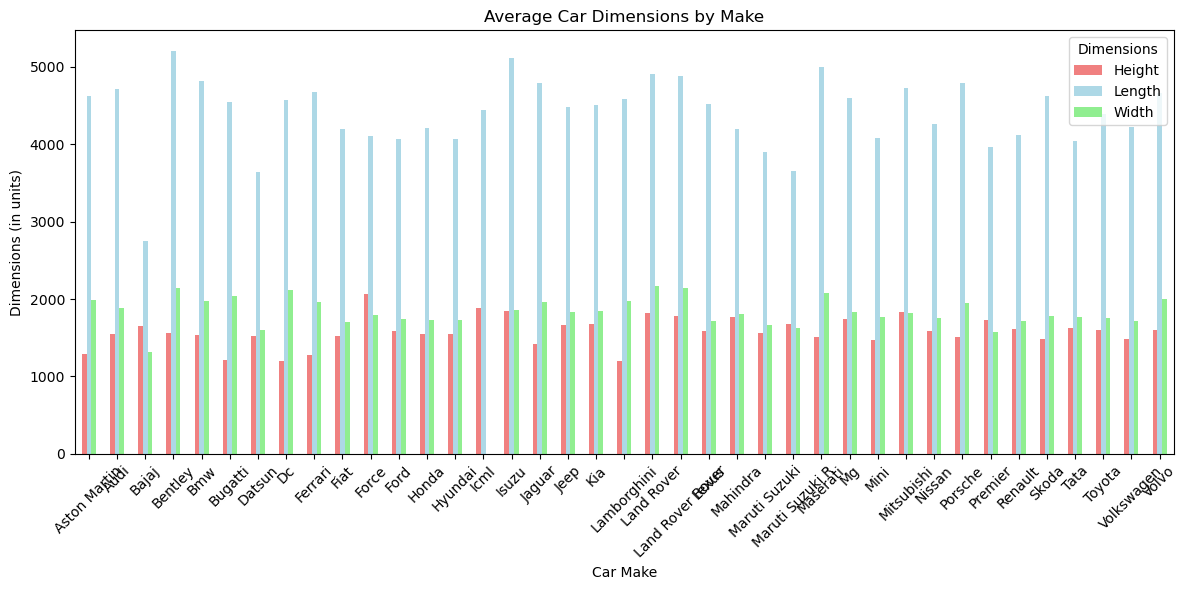

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

average_dimensions.plot(x='Make', kind='bar', figsize=(12, 6), color=['lightcoral', 'lightblue', 'lightgreen'])
plt.title("Average Car Dimensions by Make")
plt.ylabel("Dimensions (in units)")
plt.xlabel("Car Make")
plt.xticks(rotation=45)
plt.legend(title='Dimensions', labels=['Height', 'Length', 'Width'])
plt.tight_layout() 
plt.show()